<a href="https://colab.research.google.com/github/pyANSH/lp3/blob/main/ml_p5_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
dt = pd.read_csv('https://raw.githubusercontent.com/pyANSH/lp3/main/dataset/sales_data_sample.csv',encoding='latin')
dt.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


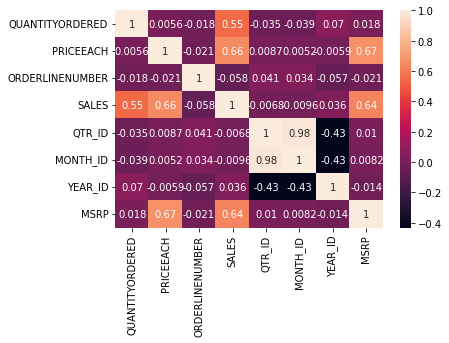

In [ ]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
dt = dt.drop(df_drop,axis=1)
import seaborn as sn
sn.heatmap(dt.corr(),annot=True)

In [ ]:
dt.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
dt=dt.drop(columns=['COUNTRY'])

In [ ]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   QUANTITYORDERED  2823 non-null   int64  
 1   PRICEEACH        2823 non-null   float64
 2   ORDERLINENUMBER  2823 non-null   int64  
 3   SALES            2823 non-null   float64
 4   ORDERDATE        2823 non-null   object 
 5   QTR_ID           2823 non-null   int64  
 6   MONTH_ID         2823 non-null   int64  
 7   YEAR_ID          2823 non-null   int64  
 8   PRODUCTLINE      2823 non-null   object 
 9   MSRP             2823 non-null   int64  
 10  COUNTRY          2823 non-null   object 
 11  DEALSIZE         2823 non-null   object 
dtypes: float64(2), int64(6), object(4)
memory usage: 264.8+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dt['DEALSIZE'] = le.fit_transform(dt['DEALSIZE'])

In [ ]:
dt.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP,DEALSIZE
0,30,95.70,2,2871.00,1,2,2003,95,2
1,34,81.35,5,2765.90,2,5,2003,95,2
2,41,94.74,2,3884.34,3,7,2003,95,1
3,45,83.26,6,3746.70,3,8,2003,95,1
4,49,100.00,14,5205.27,4,10,2003,95,1


In [ ]:
X_train = dt.values
from sklearn.cluster import KMeans, k_means
model = KMeans(n_clusters=3,random_state=2)
model = model.fit(X_train)
predictions = model.predict(X_train)

In [ ]:
import numpy as np
unique,counts = np.unique(predictions,return_counts=True)
counts = counts.reshape(1,3)
counts_df = pd.DataFrame(counts,columns=['Cluster1','Cluster2','Cluster3'])

In [ ]:
counts_df

,Cluster1,Cluster2,Cluster3
0,1083,1367,373


In [ ]:
distortions = [] # Within Cluster Sum of Squares from the centroid
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(dt)
    distortions.append(kmeanModel.inertia_) 

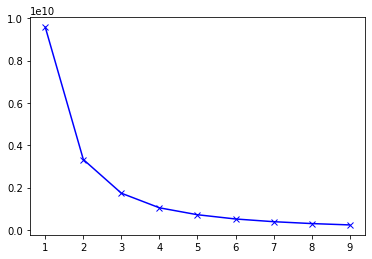

In [ ]:
import matplotlib.pyplot as plt
plt.plot(K, distortions, 'bx-')
plt.show()